<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# WorldBank - Gini index
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/WorldBank/WorldBank_Gini_index.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a><br><br><a href="https://github.com/jupyter-naas/awesome-notebooks/issues/new?assignees=&labels=&template=template-request.md&title=Tool+-+Action+of+the+notebook+">Template request</a> | <a href="https://github.com/jupyter-naas/awesome-notebooks/issues/new?assignees=&labels=bug&template=bug_report.md&title=WorldBank+-+Gini+index:+Error+short+description">Bug report</a>

**Tags:** #worldbank #opendata #snippet #plotly

**Author:** [Jeremy Ravenel](https://www.linkedin.com/in/ACoAAAJHE7sB5OxuKHuzguZ9L6lfDHqw--cdnJg/)

**Objective**

The Gini index measures the equality per country. The closest to 0 the index is, the most equal the country is. The world average Gini index is at 38.

**Data**

GINI INDEX

**Source**

World Bank, Development Research Group.

**Pitch**

https://drive.google.com/file/d/10PXCX0Czck8QJwhinVEoKV3MZGvlAVDC/view

## Input

### Import library

In [8]:
import pandas as pd
from pandas_datareader import wb
import plotly.graph_objects as go
import plotly.express as px 

## Model

### Get the association between the country and the ISO code

In [9]:
countries = wb.get_countries()
countries = countries[['name', 'iso3c']]
countries.columns = ['country', 'iso3c']
countries

,country,iso3c
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa,AFR
4,Africa Western and Central,AFW
...,...,...
294,Sub-Saharan Africa excluding South Africa and ...,XZN
295,"Yemen, Rep.",YEM
296,South Africa,ZAF
297,Zambia,ZMB


### Get gini index indicator per country

In [10]:
indicators = wb.download(indicator=['SI.POV.GINI'], country='all', start=1967, end=2018)
indicators.columns = ['GINI_INDEX']
indicators

GINI_INDEX
country                     year            
Africa Eastern and Southern 2018         NaN
                            2017         NaN
                            2016         NaN
                            2015         NaN
                            2014         NaN
...                                      ...
Zimbabwe                    1971         NaN
                            1970         NaN
                            1969         NaN
                            1968         NaN
                            1967         NaN

[13832 rows x 1 columns]

### Merge previous tables

In [11]:
master_table = pd.merge(indicators.reset_index(), countries, left_on='country', right_on='country')
master_table = master_table.set_index(['country', 'iso3c', 'year'])
master_table

GINI_INDEX
country                     iso3c year            
Africa Eastern and Southern AFE   2018         NaN
                                  2017         NaN
                                  2016         NaN
                                  2015         NaN
                                  2014         NaN
...                                            ...
Zimbabwe                    ZWE   1971         NaN
                                  1970         NaN
                                  1969         NaN
                                  1968         NaN
                                  1967         NaN

[13728 rows x 1 columns]

### Pivot previous table and fill in undefined values with values from previous years

In [12]:
pivoted_table = pd.pivot_table(master_table, index=['country', 'iso3c'], columns='year', values='GINI_INDEX')
pivoted_table = pivoted_table.ffill(axis=1)
pivoted_table

,year,1967,1969,1971,1974,1975,1977,1978,1979,1980,1981,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,iso3c,,,,,,,,,,,,,,,,,,,,,
Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,30.0,30.0,29.0,29.0,34.6,32.8,33.7,33.1,30.1
Algeria,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.3,35.3,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.7,42.7,42.7,42.7,42.7,42.7,42.7,42.7,42.7,51.3
Argentina,ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8,40.8,...,43.7,43.6,42.6,41.3,40.9,41.6,41.6,42.0,41.1,41.3
Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.0,30.0,29.4,29.6,30.6,31.5,32.4,32.5,33.6,34.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.6,39.3,39.3,35.6,35.6,34.8,34.8,35.3,35.3,35.7
West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.5,35.3,34.4,34.4,34.4,34.4,34.4,33.7,33.7,33.7
"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.7,34.7,34.7,34.7,34.7,36.7,36.7,36.7,36.7,36.7


### Show a map of gini index per country over the years (from 1969 to 2018)

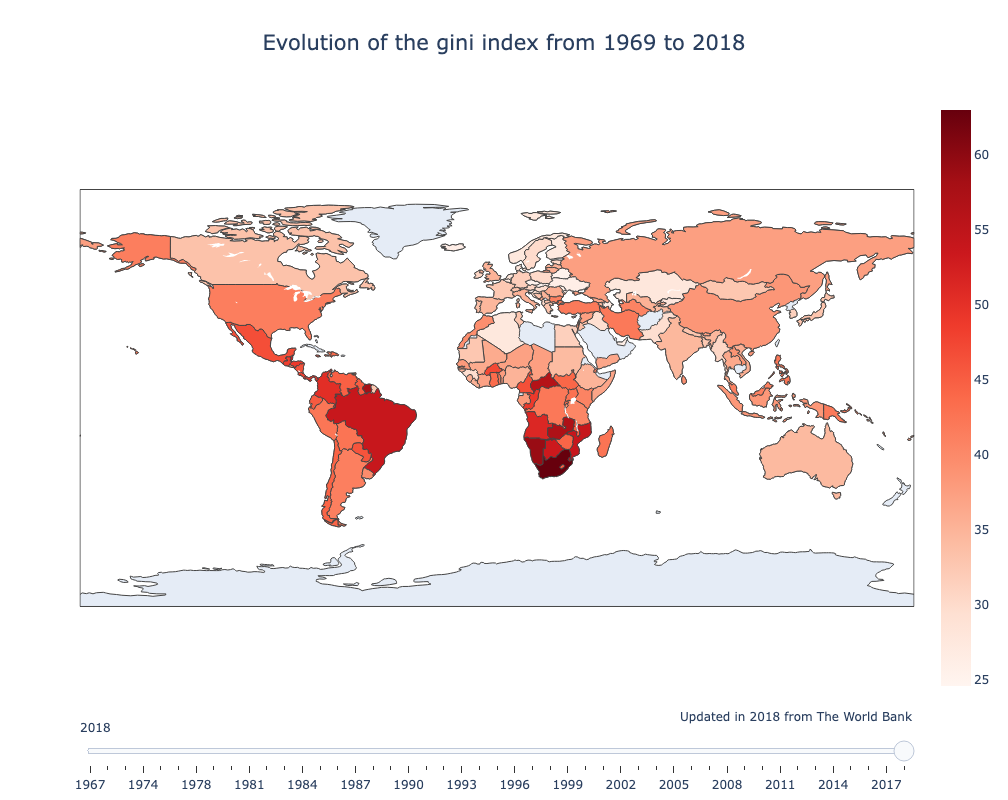

In [13]:
pivoted_table = pd.pivot_table(master_table, index=['country', 'iso3c'], columns='year', values='GINI_INDEX')
pivoted_table = pivoted_table.ffill(axis=1)
countries = list(pivoted_table.index.get_level_values(0))
locations = list(pivoted_table.index.get_level_values(1))

data = []
steps = []
i = 0
for year in pivoted_table.columns:
  data.append(dict(
    type='choropleth',
    name='',
    locations=locations,
    z=pivoted_table[year],
    hovertext=countries,
    colorscale=px.colors.sequential.Blues,
    visible=year=='2018'
  ))
  
  step = dict(
    method='restyle',
    args=['visible', [False] * len(pivoted_table.columns)],
    label=year)
  step['args'][1][i] = True
  steps.append(step)

  i = i + 1

layout = go.Layout(
  title=dict(
    text='Evolution of the gini index from 1969 to 2018', 
    x=0.5,
    font=dict(
      size=21,
    )
  ),
  sliders=[dict(steps=steps, active=len(data) - 1)],
  annotations=[dict(
    text='Updated in 2018 from The World Bank',
    showarrow=False,
    x=1,
    y=-0.05
  )],
  autosize=True,
  height=800
)

fig = go.Figure(data, layout)
fig

## Output

### Export HTML

In [14]:
fig.write_html("file.html")